In [66]:
import geopandas as gpd
import folium

# Read the GeoJSON file
geojson_file = 'geojson.json'
gdf = gpd.read_file(geojson_file)

# Create a map centered around the centroid of the GeoDataFrame with Stamen Watercolor style
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
m = folium.Map(location=center, zoom_start=14)

# Add the GeoDataFrame to the map
folium.GeoJson(gdf).add_to(m)

# Display the map
m

C:\Users\jonai\AppData\Local\Temp\ipykernel_7104\862522175.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


In [67]:
import pandas as pd
import numpy as np
scenario_names = ['baseline', 'car-free', 'one-way']

car_free_trips = pd.read_csv('scenario-data/' + scenario_names[1] + f'/{scenario_names[1]}_trip_table.csv')
baseline_trips = pd.read_csv('scenario-data/' + scenario_names[0] + f'/{scenario_names[0]}_trip_table.csv')
one_way_trips = pd.read_csv('scenario-data/' + scenario_names[2] + f'/{scenario_names[2]}_trip_table.csv')

# Divide all duration fields by 60
car_free_trips['duration'] = car_free_trips['duration'] / 60
baseline_trips['duration'] = baseline_trips['duration'] / 60
one_way_trips['duration'] = one_way_trips['duration'] / 60



In [68]:
car_free_trips['duration'].describe()

count    10083.000000
mean        11.969914
std          7.311698
min          0.094727
25%          6.759390
50%         10.172077
75%         15.455957
max         62.941072
Name: duration, dtype: float64

In [69]:
baseline_trips['duration'].describe()

count    10103.000000
mean        11.834358
std          7.459981
min          0.094727
25%          6.517274
50%          9.945082
75%         15.428667
max        103.200297
Name: duration, dtype: float64

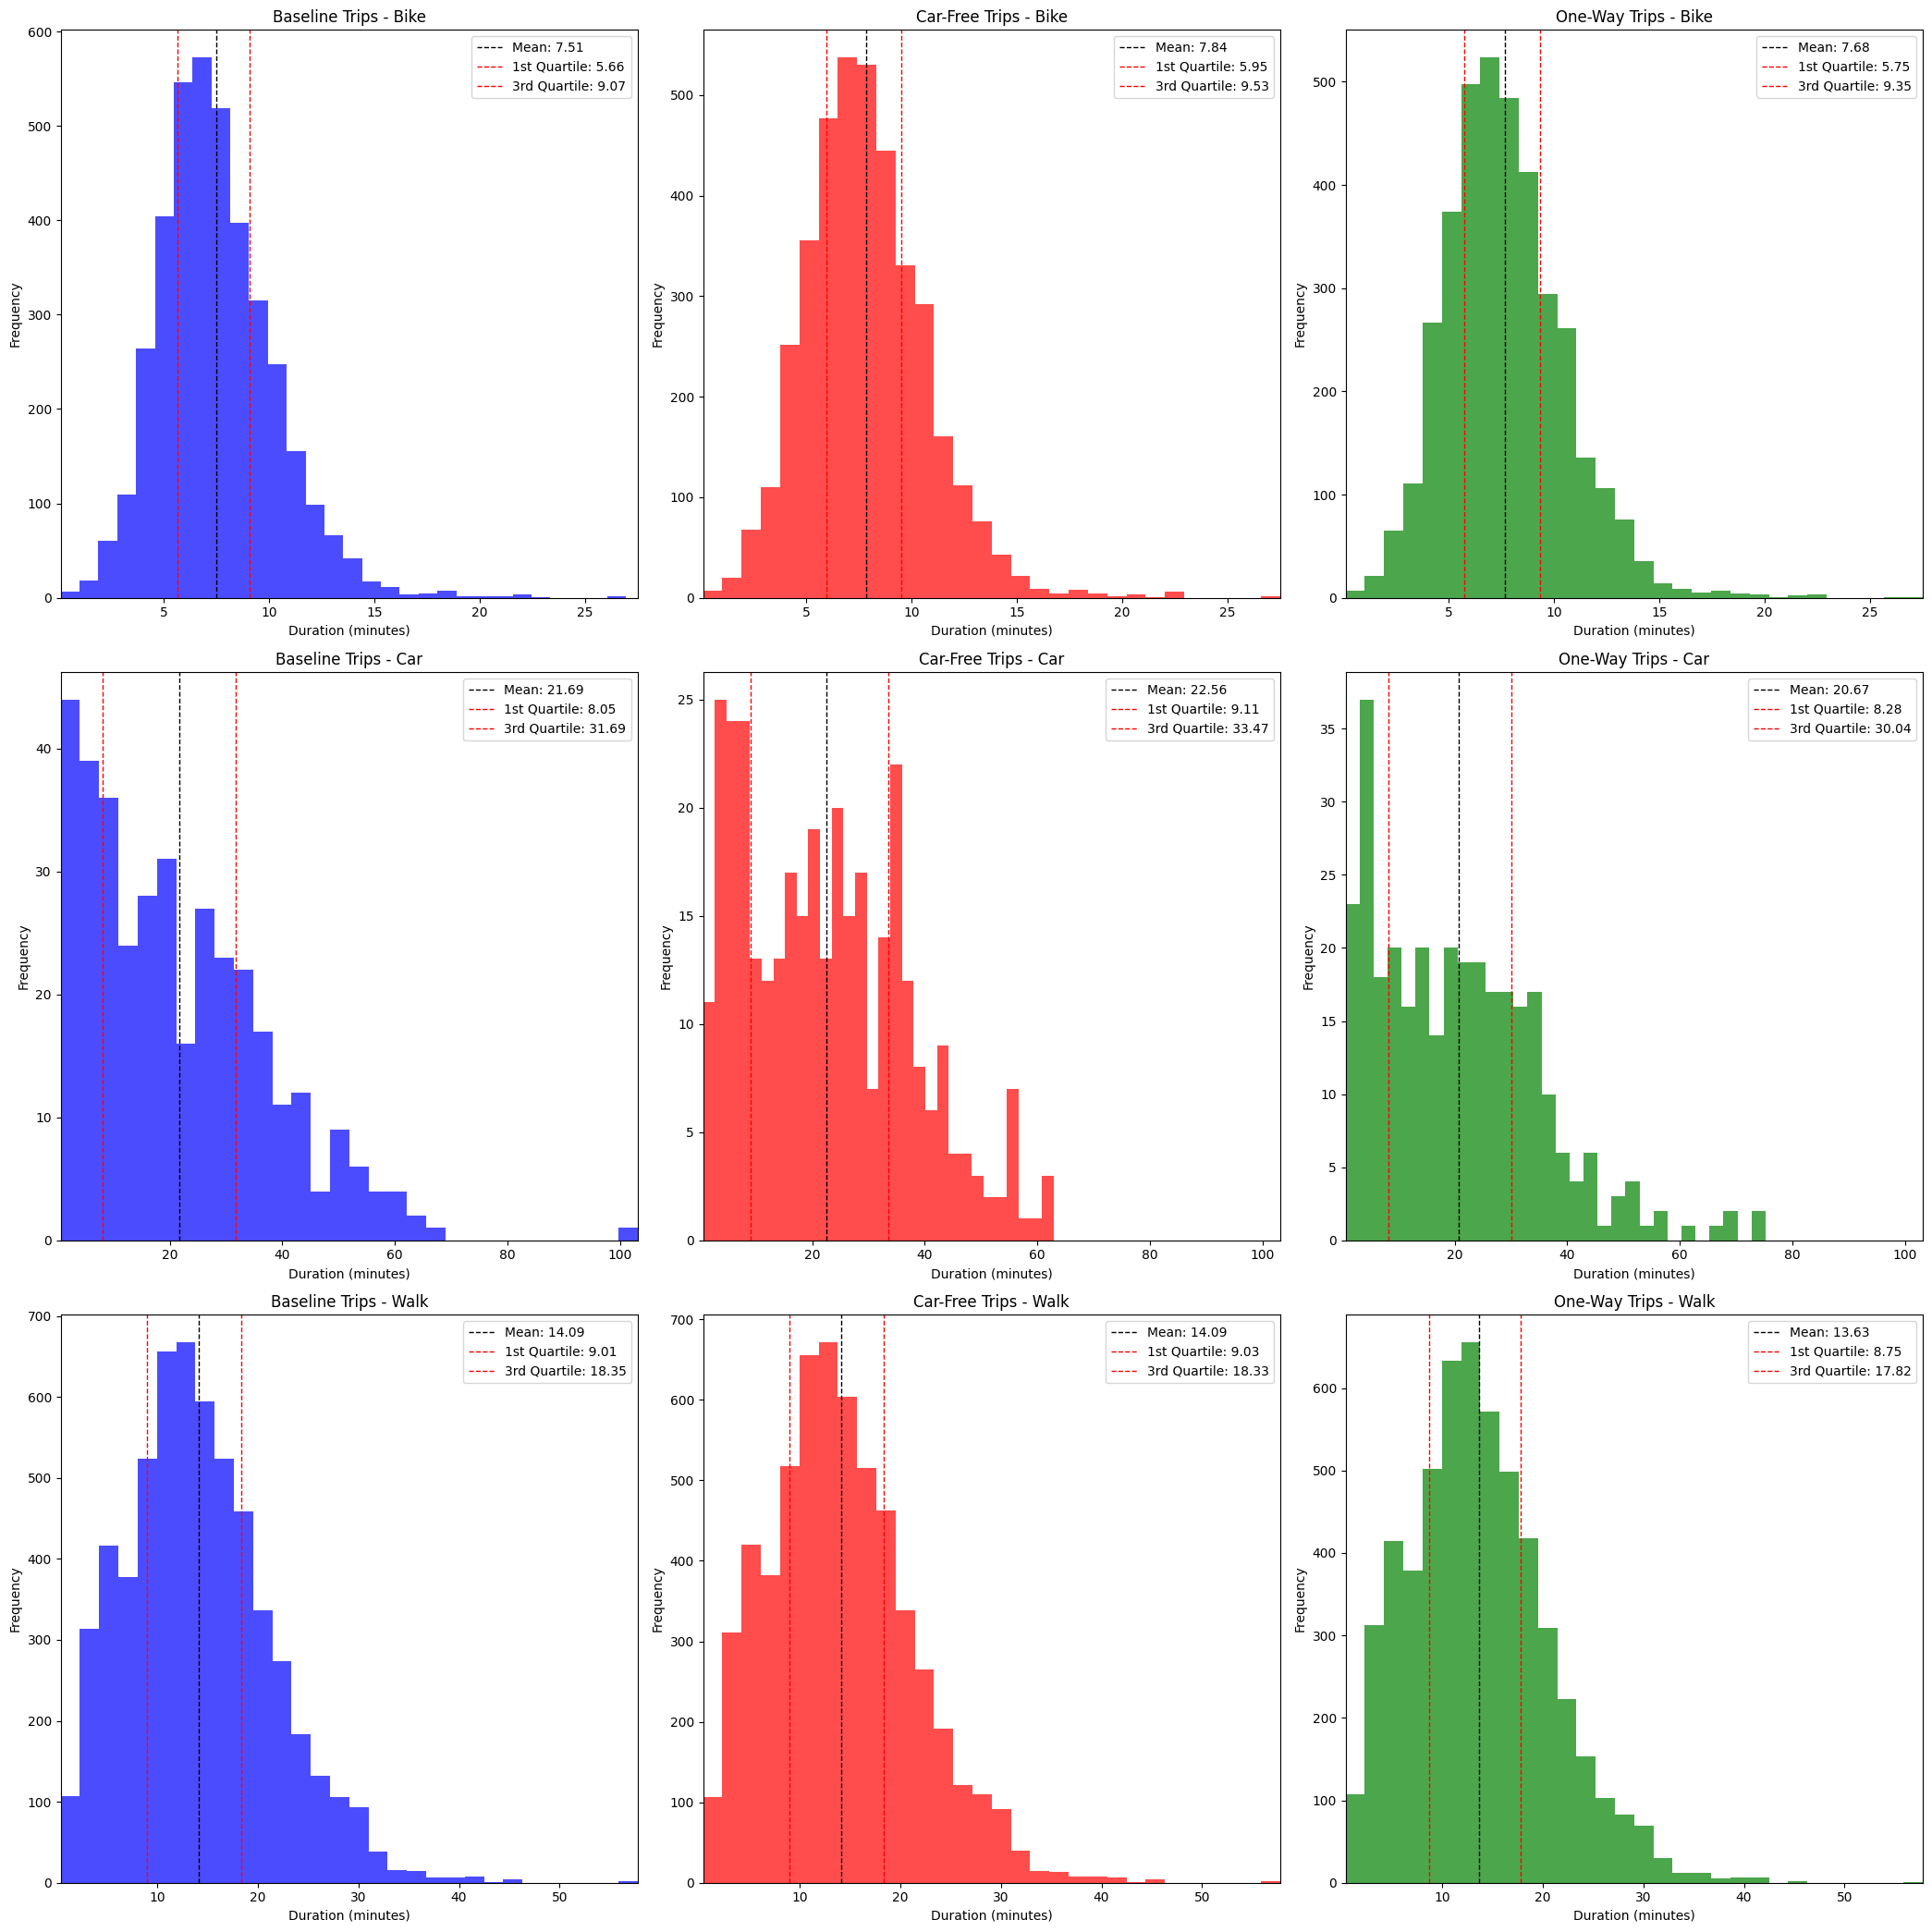

In [70]:
import matplotlib.pyplot as plt

# Filter the trips where mode is "Bike", "Car", and "Walk"
baseline_bike = baseline_trips[baseline_trips['mode'] == 'Bike']
car_free_bike = car_free_trips[car_free_trips['mode'] == 'Bike']
one_way_bike = one_way_trips[one_way_trips['mode'] == 'Bike']
baseline_car = baseline_trips[baseline_trips['mode'] == 'Drive']
car_free_car = car_free_trips[car_free_trips['mode'] == 'Drive']
one_way_car = one_way_trips[one_way_trips['mode'] == 'Drive']
baseline_walk = baseline_trips[baseline_trips['mode'] == 'Walk']
car_free_walk = car_free_trips[car_free_trips['mode'] == 'Walk']
one_way_walk = one_way_trips[one_way_trips['mode'] == 'Walk']

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(21, 21))

# Plot the distribution of duration for baseline, car-free, and one-way trips for each mode
modes = ['Bike', 'Car', 'Walk']
baseline_data = [baseline_bike, baseline_car, baseline_walk]
car_free_data = [car_free_bike, car_free_car, car_free_walk]
one_way_data = [one_way_bike, one_way_car, one_way_walk]
colors = ['blue', 'red', 'green']

for i, mode in enumerate(modes):
    data = [baseline_data[i], car_free_data[i], one_way_data[i]]
    scenario_titles = ['Baseline', 'Car-Free', 'One-Way']
    
    # Determine the x-axis limits
    min_duration = min(d['duration'].min() for d in data)
    max_duration = max(d['duration'].max() for d in data)
    
    for j, scenario in enumerate(scenario_titles):
        axes[i, j].hist(data[j]['duration'], bins=30, alpha=0.7, color=colors[j])
        axes[i, j].set_title(f'{scenario} Trips - {mode}')
        axes[i, j].set_xlabel('Duration (minutes)')
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_xlim(min_duration, max_duration)
        
        mean_duration = data[j]['duration'].mean()
        q1_duration = data[j]['duration'].quantile(0.25)
        q3_duration = data[j]['duration'].quantile(0.75)
        
        axes[i, j].axvline(mean_duration, color='k', linestyle='dashed', linewidth=1)
        axes[i, j].axvline(q1_duration, color='r', linestyle='dashed', linewidth=1)
        axes[i, j].axvline(q3_duration, color='r', linestyle='dashed', linewidth=1)
        
        axes[i, j].legend([f'Mean: {mean_duration:.2f}', f'1st Quartile: {q1_duration:.2f}', f'3rd Quartile: {q3_duration:.2f}'])

# Show the plot
plt.tight_layout()
plt.show()


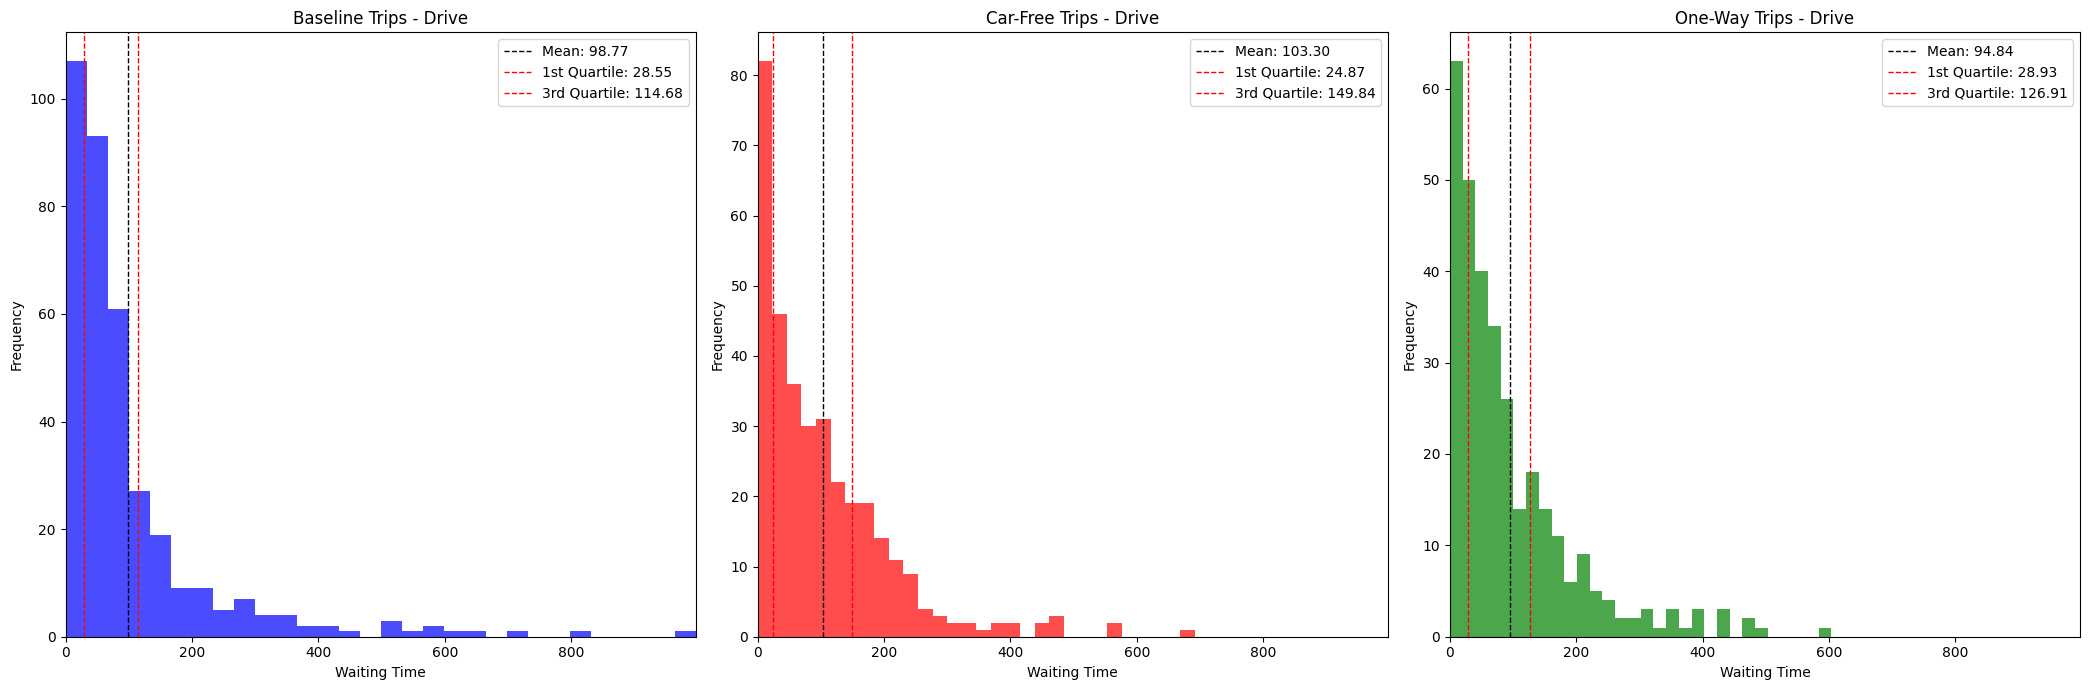

In [71]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

# Plot the distribution of waiting_time for baseline, car-free, and one-way trips for mode 'Drive'
scenarios = ['Baseline', 'Car-Free', 'One-Way']
data = [baseline_car, car_free_car, one_way_car]
colors = ['blue', 'red', 'green']

for i, scenario in enumerate(scenarios):
    # Determine the x-axis limits
    min_waiting_time = min(data[i]['waiting_time'].min() for i in range(3))
    max_waiting_time = max(data[i]['waiting_time'].max() for i in range(3))

    # Plot the histogram
    axes[i].hist(data[i]['waiting_time'], bins=30, alpha=0.7, color=colors[i])
    axes[i].set_title(f'{scenario} Trips - Drive')
    axes[i].set_xlabel('Waiting Time')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(min_waiting_time, max_waiting_time)
    
    mean_waiting_time = data[i]['waiting_time'].mean()
    q1_waiting_time = data[i]['waiting_time'].quantile(0.25)
    q3_waiting_time = data[i]['waiting_time'].quantile(0.75)
    
    axes[i].axvline(mean_waiting_time, color='k', linestyle='dashed', linewidth=1)
    axes[i].axvline(q1_waiting_time, color='r', linestyle='dashed', linewidth=1)
    axes[i].axvline(q3_waiting_time, color='r', linestyle='dashed', linewidth=1)
    
    axes[i].legend([f'Mean: {mean_waiting_time:.2f}', f'1st Quartile: {q1_waiting_time:.2f}', f'3rd Quartile: {q3_waiting_time:.2f}'])

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
car_free_road_throughput = pd.read_csv('scenario-data/' + scenario_names[1] + f'/{scenario_names[1]}_road_throughput.csv')
baseline_road_throughput = pd.read_csv('scenario-data/' + scenario_names[0] + f'/{scenario_names[0]}_road_throughput.csv')
one_way_road_throughput = pd.read_csv('scenario-data/' + scenario_names[2] + f'/{scenario_names[2]}_road_throughput.csv')

car_free_intersection_throughput = pd.read_csv('scenario-data/' + scenario_names[1] + f'/{scenario_names[1]}_intersection_throughput.csv')
baseline_intersection_throughput = pd.read_csv('scenario-data/' + scenario_names[0] + f'/{scenario_names[0]}_intersection_throughput.csv')
one_way_intersection_throughput = pd.read_csv('scenario-data/' + scenario_names[2] + f'/{scenario_names[2]}_intersection_throughput.csv')
car_free_intersection_throughput.head()

,id,agent_type,hour,count
0,0,Car,15,1
1,0,Car,16,2
2,0,Car,17,3
3,0,Bike,7,6
4,0,Bike,8,45


In [73]:
# intersections :
intersections = [85, 110, 157, 190, 56, 108]

# Pivot the dataframe to have hours as columns and id-agent_type as rows
baseline_intersection_pivot = baseline_intersection_throughput.pivot_table(index=['id', 'agent_type'], columns='hour', values='count', fill_value=0)
baseline_intersection_pivot.reset_index(inplace=True)
baseline_intersection_pivot.head()

# DataFrame with ids in the intersections array
baseline_intersection_in = baseline_intersection_pivot[baseline_intersection_pivot['id'].isin(intersections)]

# DataFrame with ids not in the intersections array
baseline_intersection_out = baseline_intersection_pivot[~baseline_intersection_pivot['id'].isin(intersections)]

baseline_intersection_in.head(), baseline_intersection_out.head()

(hour  id  agent_type    6      7      8       9     10    11    12     13  \
 89    56        Bike  0.0   97.0  161.0   268.0   21.0   2.0  14.0    6.0   
 90    56         Car  0.0    0.0   64.0   163.0   31.0   2.0  23.0    2.0   
 91    56  Pedestrian  2.0  216.0  550.0  1125.0  125.0  79.0  81.0  109.0   
 126   85        Bike  0.0  119.0  105.0   123.0   12.0   4.0   8.0    5.0   
 127   85         Car  0.0    4.0   77.0   121.0   42.0   7.0  23.0    4.0   
 
 hour    14     15     16      17    18    19   20    21    22  
 89    22.0   27.0  204.0   263.0   1.0   3.0  0.0   2.0   5.0  
 90     7.0    3.0   40.0    65.0   0.0   1.0  0.0   0.0   1.0  
 91    62.0  177.0  617.0  1187.0  63.0  27.0  7.0  14.0  24.0  
 126   12.0   78.0  152.0   146.0   1.0   3.0  1.0   0.0   2.0  
 127   18.0    8.0   22.0    19.0   0.0   0.0  0.0   0.0   0.0  ,
 hour  id  agent_type    6    7     8      9   10   11   12   13   14   15  \
 0      0        Bike  0.0  7.0  42.0   72.0  2.0  1.0  0.0  

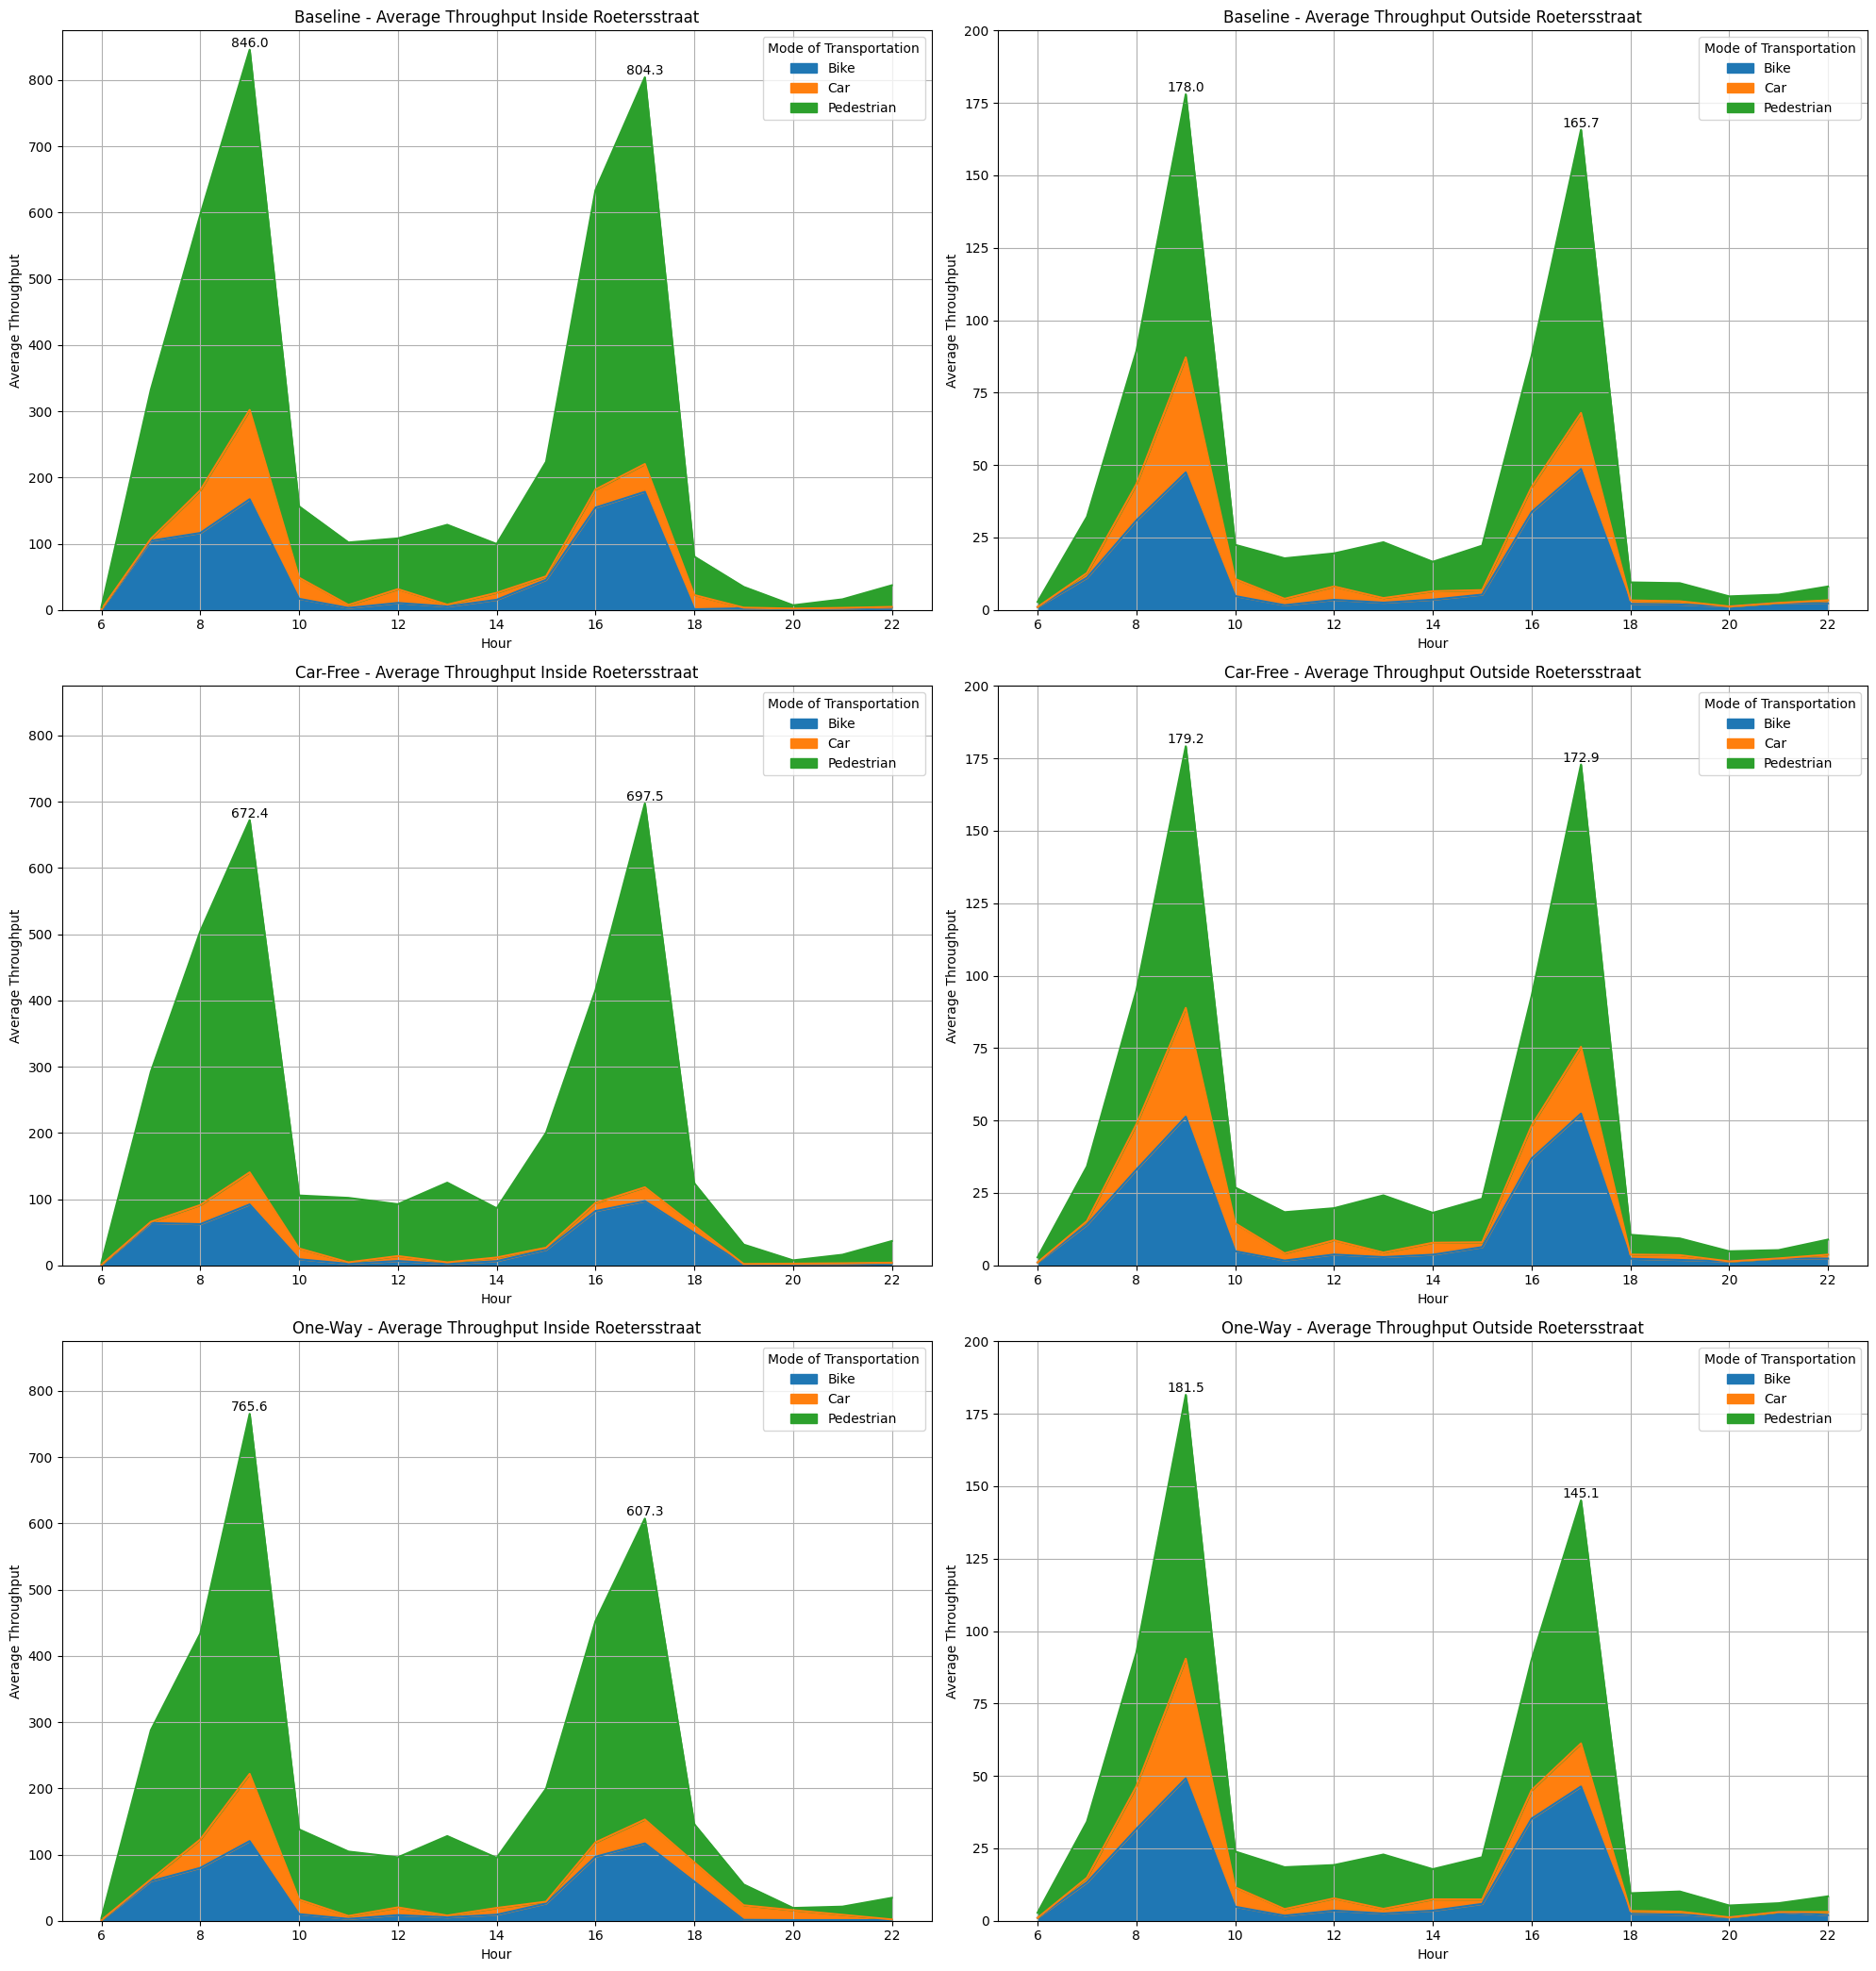

In [87]:
# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 21))

scenarios = [baseline_intersection_throughput, car_free_intersection_throughput, one_way_intersection_throughput]
scenario_names = ['Baseline', 'Car-Free', 'One-Way']

for i, scenario_data in enumerate(scenarios):
    # DataFrame with ids in the intersections array
    intersection_in = scenario_data[scenario_data['id'].isin(intersections)]
    # DataFrame with ids not in the intersections array
    intersection_out = scenario_data[~scenario_data['id'].isin(intersections)]

    # Calculate the average throughput for each mode of transportation at each hour
    average_throughput_in = intersection_in.groupby(['hour', 'agent_type'])['count'].mean().unstack()
    average_throughput_out = intersection_out.groupby(['hour', 'agent_type'])['count'].mean().unstack()

    # Interpolate zeros and NaNs
    average_throughput_in.interpolate(method='linear', axis=0, inplace=True)

    # Plot for intersections inside Roetersstraat
    average_throughput_in.plot(kind='area', stacked=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{scenario_names[i]} - Average Throughput Inside Roetersstraat')
    axes[i, 0].set_xlabel('Hour')
    axes[i, 0].set_ylabel('Average Throughput')
    
    # Add values for 9h and 17h
    total_9h = average_throughput_in.loc[9].sum()
    total_17h = average_throughput_in.loc[17].sum()
    axes[i, 0].text(9, average_throughput_in.loc[9].sum(), f'{total_9h:.1f}', 
                   verticalalignment='bottom', horizontalalignment='center')
    axes[i, 0].text(17, average_throughput_in.loc[17].sum(), f'{total_17h:.1f}', 
                   verticalalignment='bottom', horizontalalignment='center')
    
    axes[i, 0].legend(title='Mode of Transportation')
    axes[i, 0].grid(True)
    axes[i, 0].set_ylim(0, 875)  # Set y-axis limit

    # Plot for intersections outside Roetersstraat
    average_throughput_out.plot(kind='area', stacked=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{scenario_names[i]} - Average Throughput Outside Roetersstraat')
    axes[i, 1].set_xlabel('Hour')
    axes[i, 1].set_ylabel('Average Throughput')
    
    # Add values for 9h and 17h
    total_9h = average_throughput_out.loc[9].sum()
    total_17h = average_throughput_out.loc[17].sum()
    axes[i, 1].text(9, average_throughput_out.loc[9].sum(), f'{total_9h:.1f}', 
                   verticalalignment='bottom', horizontalalignment='center')
    axes[i, 1].text(17, average_throughput_out.loc[17].sum(), f'{total_17h:.1f}', 
                   verticalalignment='bottom', horizontalalignment='center')
    
    axes[i, 1].legend(title='Mode of Transportation')
    axes[i, 1].grid(True)
    axes[i, 1].set_ylim(0, 200)  # Set y-axis limit

# Adjust layout and display
plt.tight_layout()
plt.show()


In [88]:
# Create lists to store the data
scenarios = ['Baseline', 'Car-Free', 'One-Way']
data = []

# Process data for each scenario
for scenario_data in [baseline_intersection_throughput, car_free_intersection_throughput, one_way_intersection_throughput]:
    # Filter for intersections inside Roetersstraat
    intersection_in = scenario_data[scenario_data['id'].isin(intersections)]
    
    # Calculate average throughput by hour and agent type
    avg_throughput = intersection_in.groupby(['hour', 'agent_type'])['count'].mean().unstack()
    
    # Get values for 9h and 17h
    data.append({
        'Scenario': scenarios[len(data)],
        'Bike 9h': avg_throughput.loc[9, 'Bike'] if 'Bike' in avg_throughput.columns else 0,
        'Bike 17h': avg_throughput.loc[17, 'Bike'] if 'Bike' in avg_throughput.columns else 0,
        'Car 9h': avg_throughput.loc[9, 'Car'] if 'Car' in avg_throughput.columns else 0,
        'Car 17h': avg_throughput.loc[17, 'Car'] if 'Car' in avg_throughput.columns else 0,
        'Pedestrian 9h': avg_throughput.loc[9, 'Pedestrian'] if 'Pedestrian' in avg_throughput.columns else 0,
        'Pedestrian 17h': avg_throughput.loc[17, 'Pedestrian'] if 'Pedestrian' in avg_throughput.columns else 0
    })

# Create DataFrame and display
comparison_df = pd.DataFrame(data)
comparison_df = comparison_df.round(1)
print(comparison_df.to_string(index=False))

Scenario  Bike 9h  Bike 17h  Car 9h  Car 17h  Pedestrian 9h  Pedestrian 17h
Baseline    167.2     178.3   134.8     42.0          544.0           584.0
Car-Free     92.0      97.0    48.4     20.8          532.0           579.8
 One-Way    120.3     116.8   101.5     36.0          543.8           454.5
